# **CSST 106** - Perception and Computer Vision

**Name:** Cayadong, Marjelaine M.

**Program, Year & Section:** BSCS - 4B

**Install OpenCV**

In [1]:
!pip install opencv-python-headless

**Task 1: SIFT Feature Extraction**

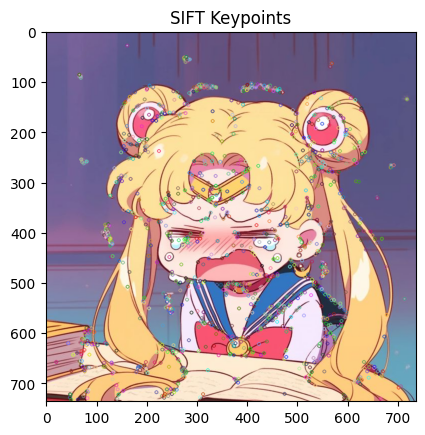

In [4]:
import cv2
import matplotlib.pyplot as plt

#Load the image
image = cv2.imread('Usagi.jpg')
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

#Initialize SIFT detector
sift = cv2.SIFT_create()

#Detect keypoints and descriptors
keypoints, descriptors = sift.detectAndCompute(gray_image, None)

#Draw keypoints on the image
image_with_keypoints = cv2.drawKeypoints(image, keypoints, None)

#Display the image with keypoints
plt.imshow(cv2.cvtColor(image_with_keypoints, cv2.COLOR_BGR2RGB))
plt.title('SIFT Keypoints')
plt.show()

**Task 2: SURF Feature Extraction**

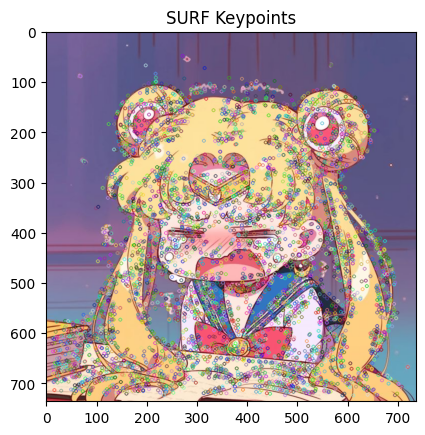

In [3]:
import cv2
import matplotlib.pyplot as plt

# Load the image
image = cv2.imread('Usagi.jpg')
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Initialize SURF detector
surf = cv2.xfeatures2d.SURF_create()

# Detect keypoints and descriptors
keypoints, descriptors = surf.detectAndCompute(gray_image, None)

# Draw keypoints on the image
image_with_keypoints2 = cv2.drawKeypoints(image, keypoints, None)

# Display the image with keypoints
plt.imshow(cv2.cvtColor(image_with_keypoints2, cv2.COLOR_BGR2RGB))
plt.title('SURF Keypoints')
plt.show()

**Task 3: ORB Feature Extraction**

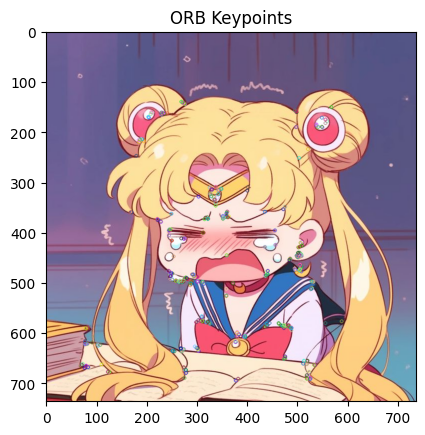

In [6]:
import cv2
import matplotlib.pyplot as plt

#Load the image
image = cv2.imread('Usagi.jpg')
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

#Initialize ORB detector
orb = cv2.ORB_create()

#Detect keypoints and descriptors
keypoints, descriptors = orb.detectAndCompute(gray_image, None)

#Draw keypoints on the image
image_with_keypoints3 = cv2.drawKeypoints(image, keypoints, None)

#Display the image with keypoints
plt.imshow(cv2.cvtColor(image_with_keypoints3, cv2.COLOR_BGR2RGB))
plt.title('ORB Keypoints')
plt.show()

**Task 4: Feature Matching**

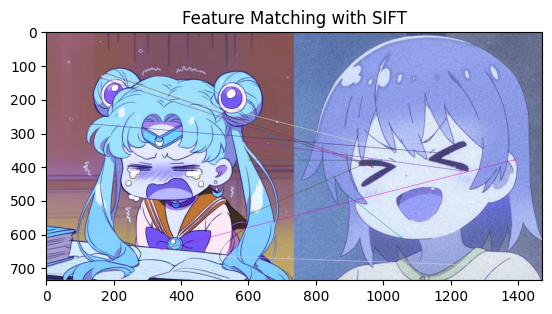

In [14]:
import cv2
import matplotlib.pyplot as plt

#Load 2 images
image1 = cv2.imread('Usagi.jpg')
image2 = cv2.imread('Chiharu.jpg')

#Initialize SIFT detector
sift = cv2.SIFT_create()

#Find keypoints and descriptors with SIFT
keypoints1, descriptors1 = sift.detectAndCompute(image1, None)
keypoints2, descriptors2 = sift.detectAndCompute(image2, None)

#Initialize the matcher
bf = cv2.BFMatcher(cv2.NORM_L2, crossCheck=True)

#Match descriptors
matches = bf.match(descriptors1, descriptors2)

#Sort matches by distance (best matches first)
matches = sorted(matches, key=lambda x: x.distance)

#Draw matches
image_matches = cv2.drawMatches(image1, keypoints1, image2, keypoints2, matches[:10], None, flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)

#Display the image with matches
plt.imshow(image_matches)
plt.title('Feature Matching with SIFT')
plt.show()

**Task 5: Applications of Feature Matching**

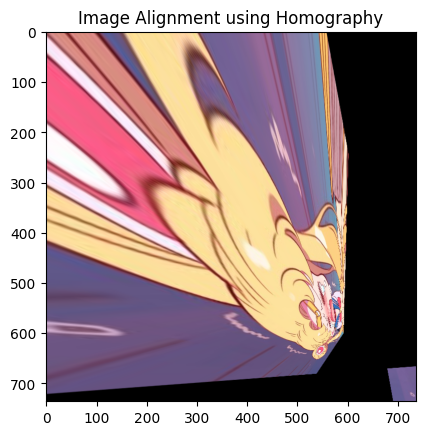

In [21]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

#Load two images
image1 =cv2.imread('Usagi.jpg')
image2 = cv2.imread('Chiharu.jpg')

#Convert to grayscale
gray1 = cv2.cvtColor(image1, cv2.COLOR_BGR2GRAY)
gray2 = cv2.cvtColor(image2, cv2.COLOR_BGR2GRAY)

#Detect keypoints and descriptors using SIFT
sift = cv2.SIFT_create()
keypoints1, descriptors1 = sift.detectAndCompute(gray1, None)
keypoints2, descriptors2 = sift.detectAndCompute(gray2, None)

#Match features using BFMatcher
bf = cv2.BFMatcher()
matches = bf.knnMatch(descriptors1, descriptors2, k=2)

#Apply ratio test (Lowe's ratio test)
good_matches = []
for m, n in matches:
  if m.distance <0.75 * n.distance:
    good_matches.append(m)

#Extract location of good matches
src_pts = np.float32(
    [keypoints1[m.queryIdx].pt for m in good_matches]
).reshape(-1, 1, 2)
dst_pts = np.float32(
    [keypoints2[m.trainIdx].pt for m in good_matches]
).reshape(-1, 1, 2)

#Find homography matrix
M, mask = cv2.findHomography(src_pts, dst_pts, cv2.RANSAC, 5.0)

#Warp one image to align with the other
h, w, _ = image1.shape
result = cv2.warpPerspective(image1, M, (w, h))

#Display the result
plt.imshow(cv2.cvtColor(result, cv2.COLOR_BGR2RGB))
plt.title('Image Alignment using Homography')
plt.show()

**Task 6: Combining Feature Extraction Methods**


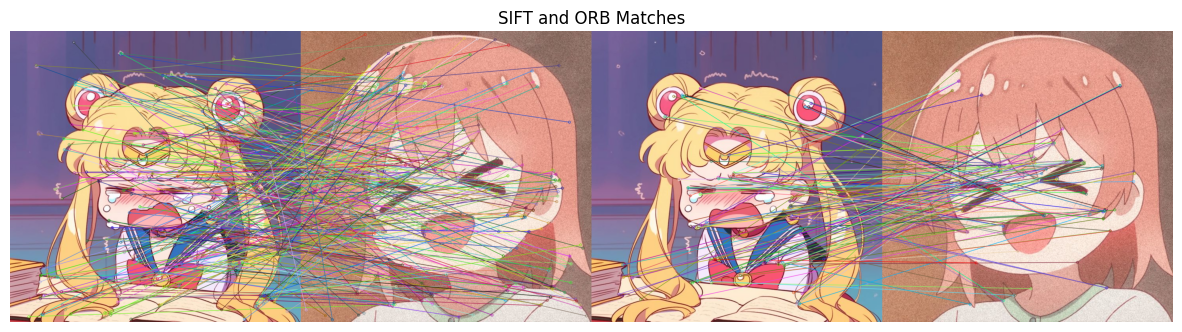

In [19]:
import cv2
import matplotlib.pyplot as plt

# Load two images
image1 = cv2.imread('Usagi.jpg')
image2 = cv2.imread('Chiharu.jpg')

# Initialize SIFT and ORB detectors
sift = cv2.SIFT_create()
orb = cv2.ORB_create()

# Detect and compute SIFT features
keypoints1_sift, descriptors1_sift = sift.detectAndCompute(image1, None)
keypoints2_sift, descriptors2_sift = sift.detectAndCompute(image2, None)

# Detect and compute ORB features
keypoints1_orb, descriptors1_orb = orb.detectAndCompute(image1, None)
keypoints2_orb, descriptors2_orb = orb.detectAndCompute(image2, None)

# Match SIFT descriptors using Brute Force Matcher
bf_sift = cv2.BFMatcher(cv2.NORM_L2, crossCheck=True)
matches_sift = bf_sift.match(descriptors1_sift, descriptors2_sift)

# Match ORB descriptors using Brute Force Matcher
bf_orb = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck=True)
matches_orb = bf_orb.match(descriptors1_orb, descriptors2_orb)

# Draw matches
image_matches_sift = cv2.drawMatches(image1, keypoints1_sift, image2, keypoints2_sift, matches_sift, None, flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)
image_matches_orb = cv2.drawMatches(image1, keypoints1_orb, image2, keypoints2_orb, matches_orb, None, flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)

# Combine the matched images for display
combined_image = cv2.hconcat([image_matches_sift, image_matches_orb])

# Display the combined result
plt.figure(figsize=(15, 10))
plt.imshow(cv2.cvtColor(combined_image, cv2.COLOR_BGR2RGB))
plt.title('SIFT and ORB Matches')
plt.axis('off')
plt.show()
